# Библиотета Matplotlib

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

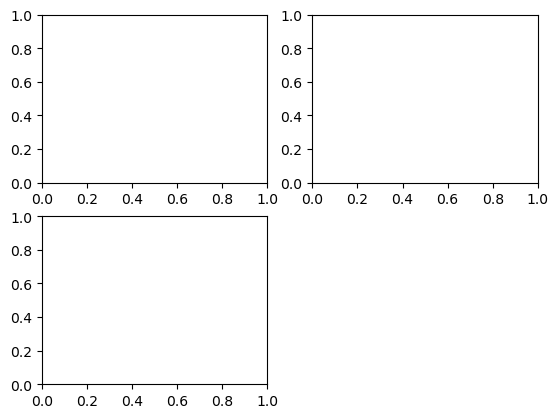

In [48]:
fig = plt.figure()
ax1 = fig.add_subplot(221) # первая цифра - число строк, вторая - число столбцов, обращение к каждому из подграфиков по порядку
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

plt.show()
plt.close()

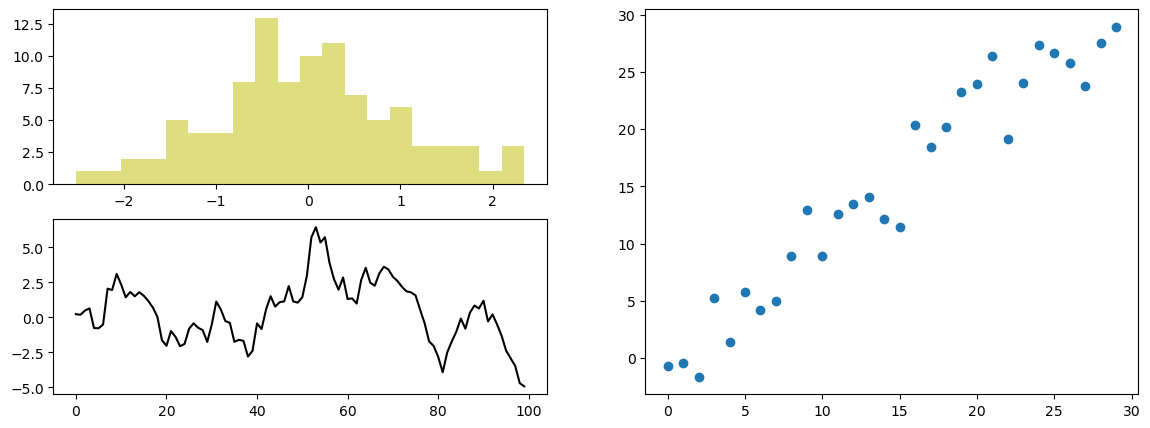

In [73]:
fig = plt.figure(figsize = (14, 5))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(122)
ax3 = fig.add_subplot(223)

f1 = ax1.hist(np.random.randn(100), bins=20, color='y', alpha=0.5)
f2 = ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))
f3 = ax3.plot(np.random.randn(100).cumsum(), 'k-')

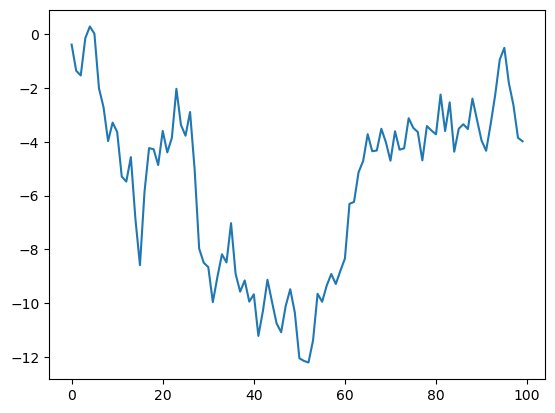

In [77]:
plt.plot(np.random.randn(100).cumsum())

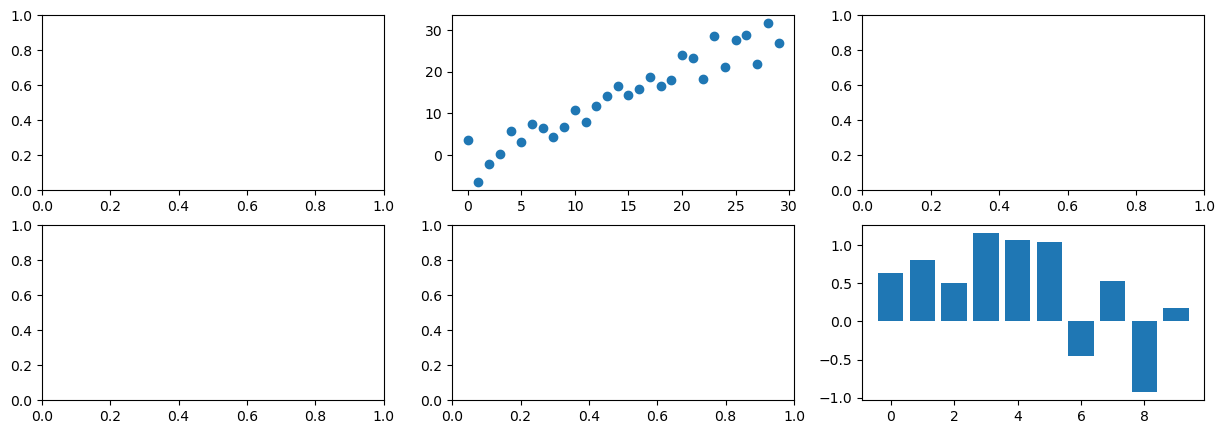

In [93]:
fig, axes = plt.subplots(2, 3)
fig.set_figheight(5)
fig.set_figwidth(15)

axes[0, 1].scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))
axes[1, 2].bar(np.arange(10), np.random.randn(10))

plt.show()

In [95]:
axes

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

# Визуализация с помощью библиотеки Pandas

In [147]:
df = pd.read_csv('heart.csv', sep = ',')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [102]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: xlabel='ChestPainType'>

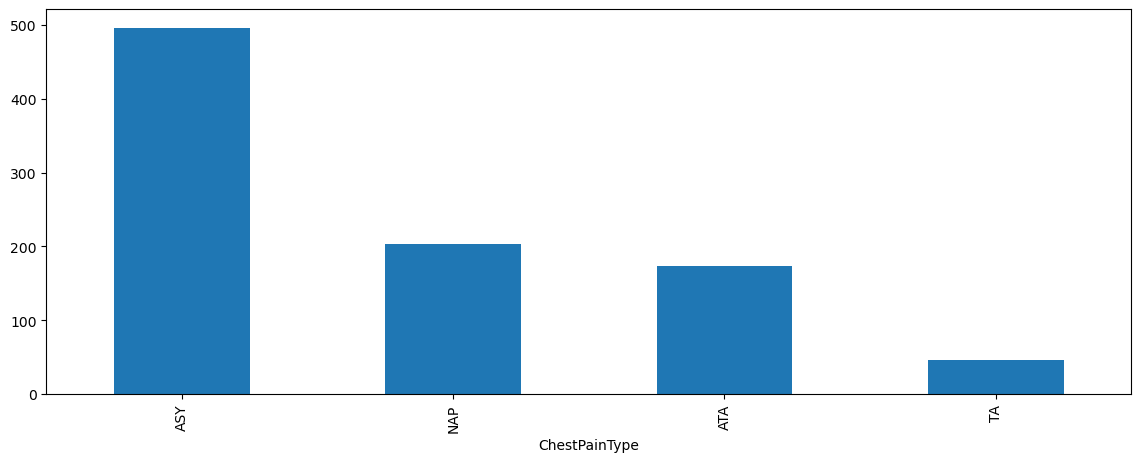

In [108]:
fig = plt.figure(figsize = (14, 5))
df['ChestPainType'].value_counts().plot.bar()

<Axes: xlabel='ChestPainType'>

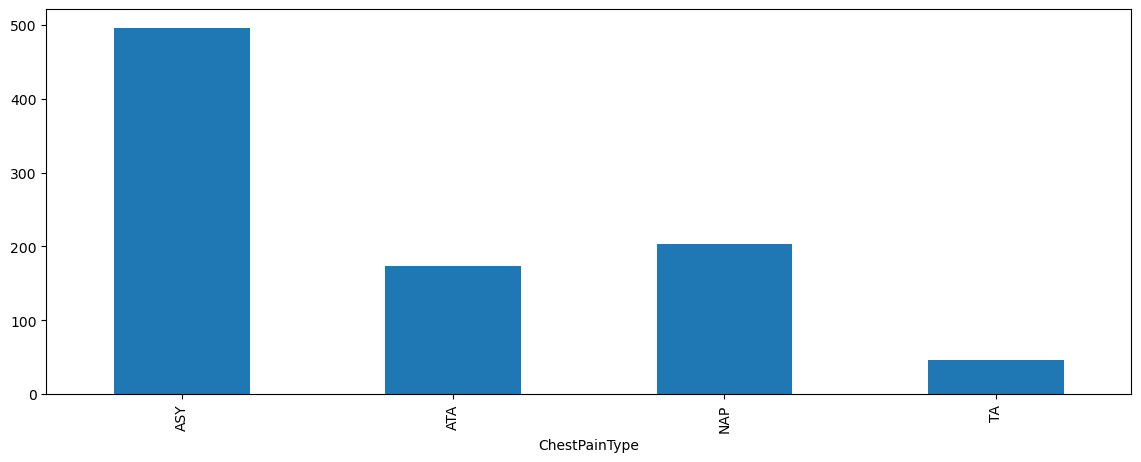

In [110]:
fig = plt.figure(figsize = (14, 5))
df['ChestPainType'].value_counts().sort_index().plot.bar

<Axes: xlabel='ChestPainType'>

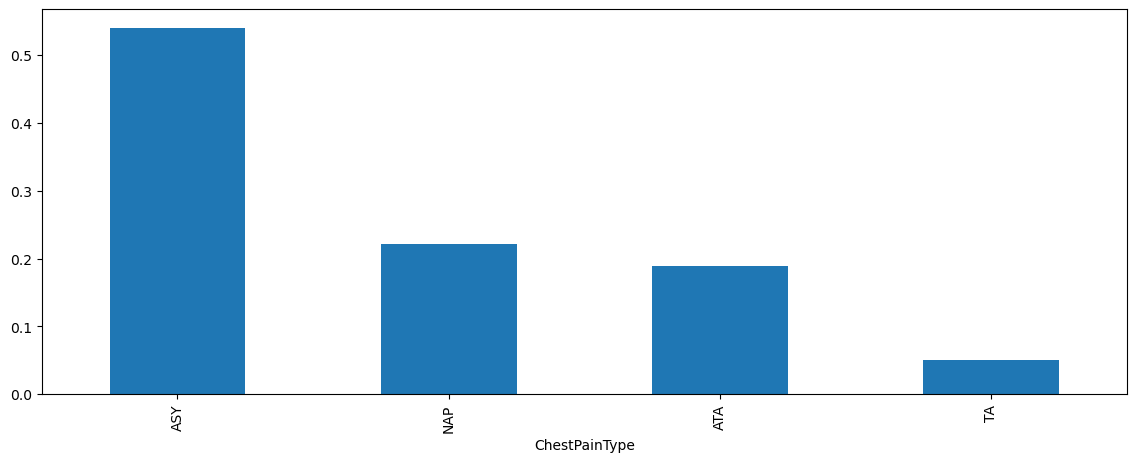

In [112]:
# посмотрим относительные наблюдения 
fig = plt.figure(figsize = (14, 5))
(df['ChestPainType'].value_counts()/len(df)).plot.bar()

In [114]:
df.groupby('HeartDisease')[['Age', 'Cholesterol']].mean()

,Age,Cholesterol
HeartDisease,,
0,50.551220,227.121951
1,55.899606,175.940945


<Axes: xlabel='HeartDisease'>

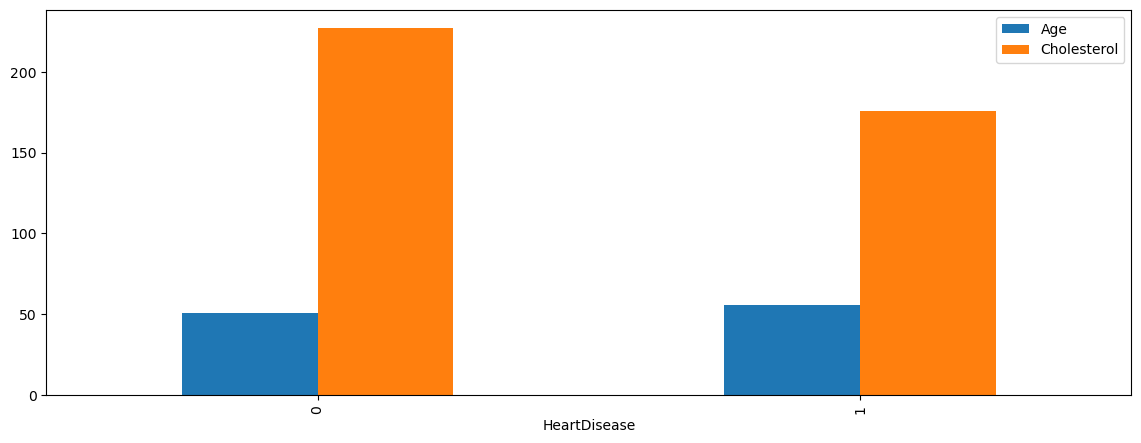

In [124]:
df.groupby('HeartDisease')[['Age', 'Cholesterol']].mean().plot.bar(figsize = (14, 5) , stacked = False)

<Axes: ylabel='Frequency'>

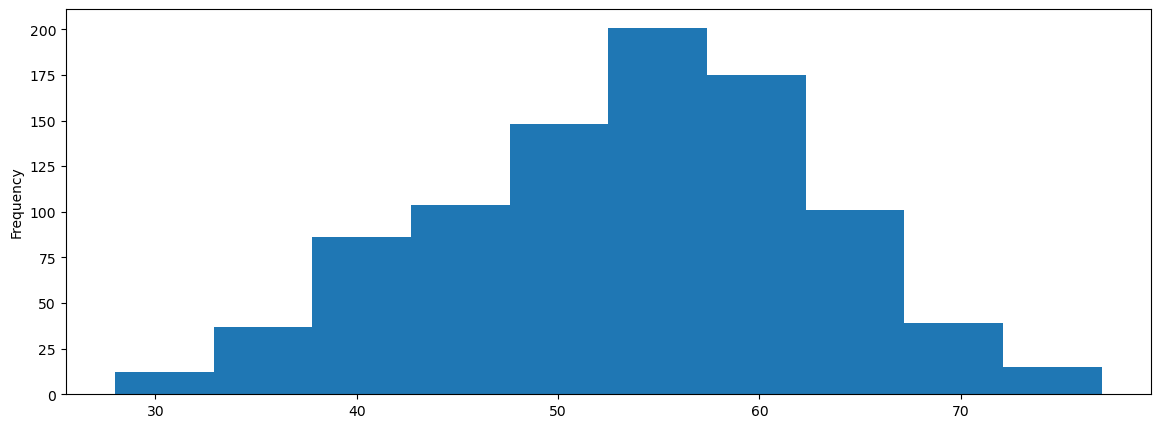

In [126]:
fig = plt.figure(figsize = (14, 5))
df['Age'].plot.hist(bins = 10)

<Axes: ylabel='Frequency'>

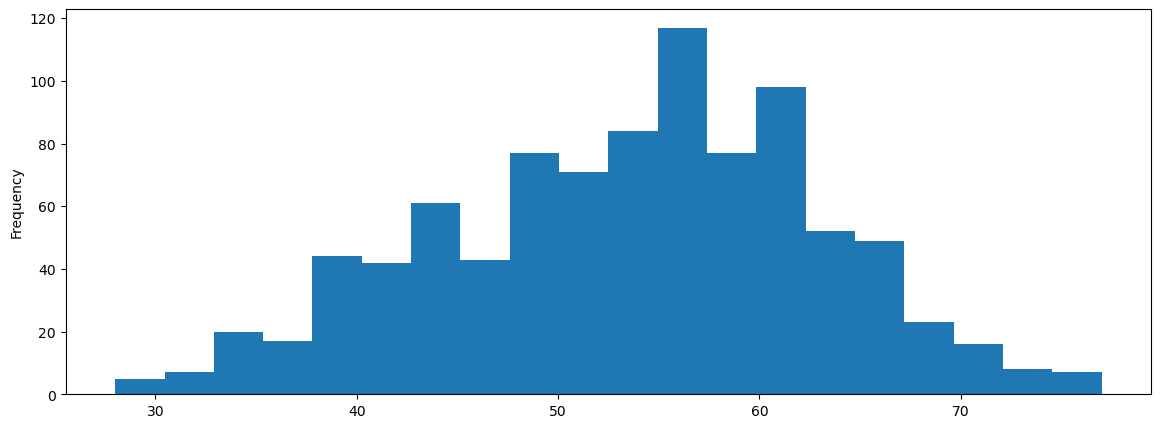

In [132]:
fig = plt.figure(figsize = (14, 5))
df['Age'].plot.hist(bins = 20)

### Двумерные данные 

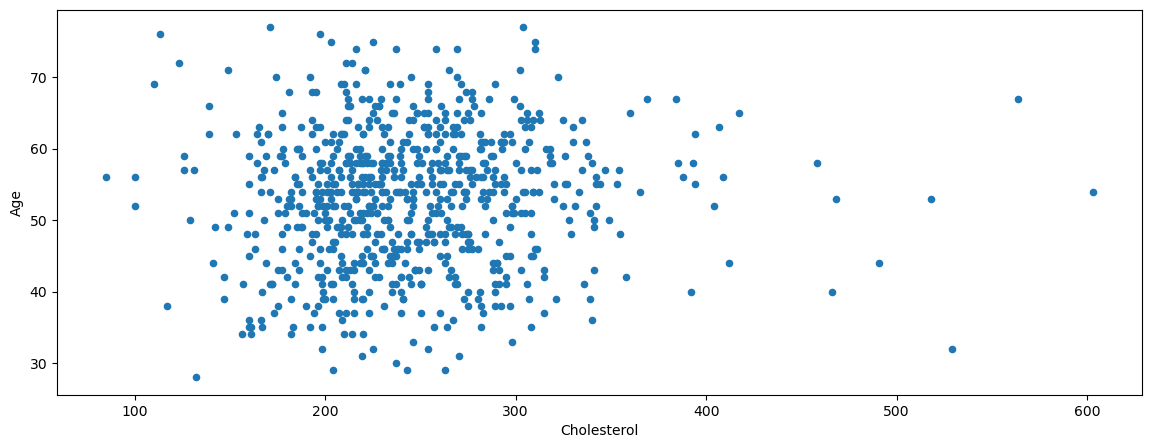

In [161]:
df['Cholesterol'] = np.where(df['Cholesterol']==0, np.nan, df['Cholesterol'])

df.plot.scatter(x = 'Cholesterol', y = 'Age', figsize = (14, 5))

plt.show()

<Axes: xlabel='Cholesterol', ylabel='Age'>

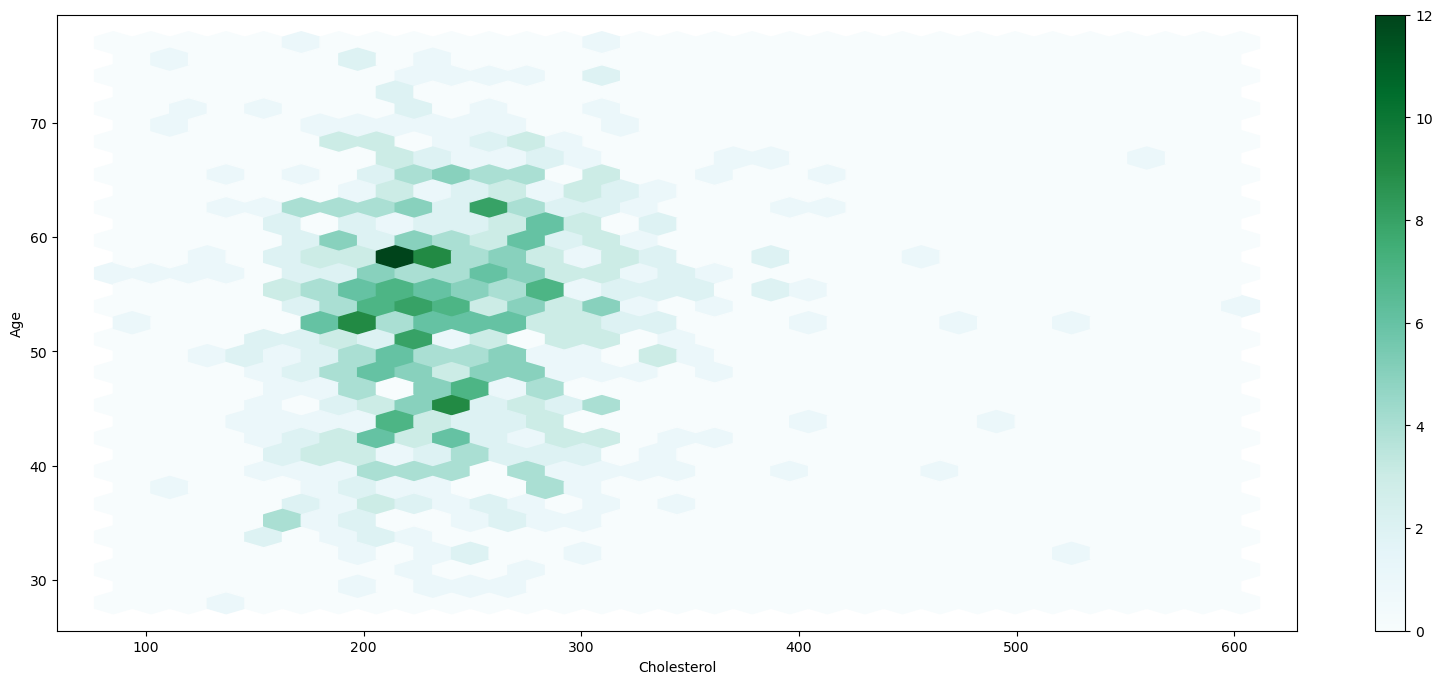

In [163]:
df.plot.hexbin(x = 'Cholesterol', y = 'Age', figsize = (20, 8), gridsize = 30)